In [379]:
%%writefile modulation.py
import numpy as np
from math import sin, cos, sqrt, pi

def qpsk_modulate(signal, p = 100, sampling = 1):    
    nosdata = len(signal)
    times = sampling
    modsig = np.zeros(nosdata*p*32*times, dtype=np.float)

    for i in range(nosdata):
        sig = int(signal[i])
        for k in range(32):
            for j in range(p*times):
                if sig&0x01:
                    S = 1 * sin(((2*pi/p) * (i*p*32+k*p+j)) + pi)
                else:
                    S = 1 * sin(((2*pi/p) * (i*p*32+k*p+j)))

                if sig&0x02:
                    C = 1 * cos(((2*pi/p) * (i*p*32+k*p+j)) + pi)
                else:
                    C = 1 * cos(((2*pi/p) * (i*p*32+k*p+j)))
                modsig[i*p*32+k*p+j] = S + C  
            sig = sig >> 2
            
    return modsig

def qpsk_demodulate(modsig, p = 100, sampling = 1):    
    times = sampling
    nosdata = len(modsig)/(p*times)
    Scarrier = np.array([1 * sin((2*pi/p) * i) for i in range(p*times)], dtype=np.float)
    Ccarrier = np.array([1 * cos((2*pi/p) * i) for i in range(p*times)], dtype=np.float)
    val = []
    rval = 0
    j = 0

    for i in range(nosdata):
        Sconvolve = (np.convolve(Scarrier, modsig[i*p*times:(i+1)*p*times]))
        Cconvolve = (np.convolve(Ccarrier, modsig[i*p*times:(i+1)*p*times]))
        
        if np.max(Sconvolve) + np.min(Sconvolve) > 0:
            cval = 1
        else:
            cval = 0
        if np.max(Cconvolve) + np.min(Cconvolve) > 0:
            sval = 0
        else:
            sval = 1
        dval = cval ^ sval <<1
        
        rval = rval ^ dval << j
        j += 2
        if j ==64:
            j = 0
            val.append(rval)
            rval = 0
            
    return np.array(val, dtype=np.uint64)

Overwriting modulation.py


matched


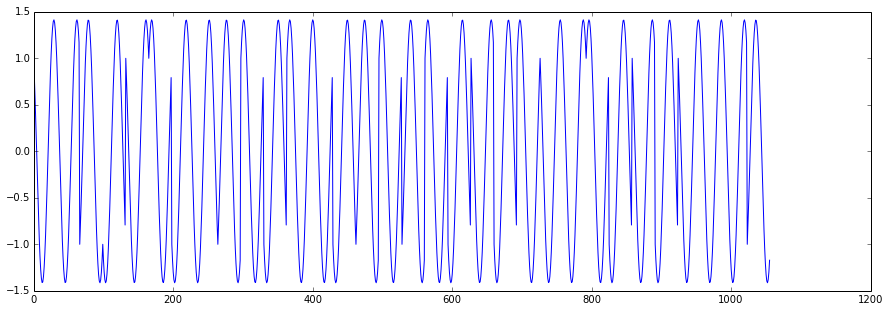

In [386]:
from random import randrange
import modulation
nosdata = 1
p = 33
signal = np.array([randrange(0, 2**64) for i in range(nosdata)], dtype=np.uint64)
#print signal

modsig = qpsk_modulate(signal, p = p)
dmodsig = qpsk_demodulate(modsig, p = p)
#print dmodsig
if (signal == dmodsig).all():
    print 'matched'
else:
    print 'error'
x = range(len(modsig))

plt.figure(figsize=(15, 5))
plt.plot(x,modsig)
plt.show()


In [388]:
print len(modsig)

1056
